# Empirical Bayes - NFL Kickers

Trying to apply the ideas from David Robinson's [blog posts/book](http://varianceexplained.org/r/empirical_bayes_baseball/) to NFL kickers

In [31]:
data_location = r'C:\Users\tblan\Desktop\kickers'
min_attempts = 50

In [32]:
import numpy as np
import matplotlib.pyplot as pyplot
import pandas
import scipy.stats as stats
import glob
import os.path as path

In [33]:
frames = [pandas.read_csv(fname) for fname in glob.glob(path.join(data_location, 'k*.csv'))]

In [34]:
frames = [f.filter(['Player','FGM', 'FG Att']).set_index('Player') for f in frames]

In [35]:
kickers = frames[0]
for f in frames[1:]:
    kickers = kickers.add(f, fill_value=0)

In [36]:
kickers = kickers.where(kickers['FG Att'] >= min_attempts).dropna()

In [37]:
kickers = kickers.assign(PCT = lambda x: x['FGM']/x['FG Att'])

In [38]:
a,b,_x,_y = stats.beta.fit(kickers['PCT'], floc=0, fscale=1)

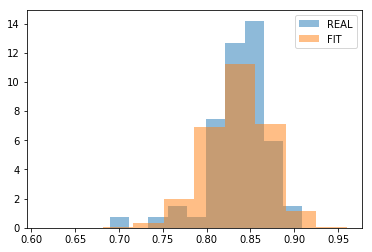

In [39]:
pyplot.hist(kickers['PCT'], alpha=0.5, label='REAL', normed=True)
pyplot.hist([np.random.beta(a,b) for i in range(1000000)], alpha=0.5, label='FIT', normed=True)
pyplot.legend(loc='upper right')

In [40]:
a/(a+b)

0.83510443266284595

In [41]:
def bayesit(att, made, a, b):
    return (made+a)/(a+b+att)

In [42]:
kickers = kickers.assign(EB_PCT = bayesit(kickers['FG Att'], kickers['FGM'], a, b))

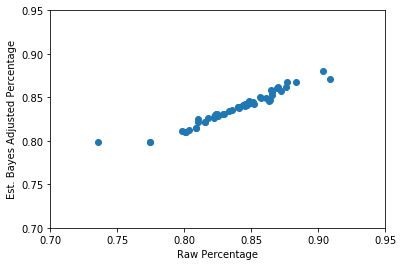

In [56]:
axScatter = pyplot.subplot(111)
pyplot.xlim(0.7, 0.95)
pyplot.ylim(0.7, 0.95)
axScatter.set_xlabel("Raw Percentage")
axScatter.set_ylabel("Est. Bayes Adjusted Percentage")
axScatter.scatter(kickers['PCT'],kickers['EB_PCT'])

In [44]:
cols = ['PCT']
tups = kickers[cols].sort_values(cols, ascending=False).apply(tuple, 1)
f, i = pandas.factorize(tups)
factorized = pandas.Series(f + 1, tups.index)
kickers = kickers.assign(PCT_Rank=factorized)

In [45]:
cols = ['EB_PCT']
tups = kickers[cols].sort_values(cols, ascending=False).apply(tuple, 1)
f, i = pandas.factorize(tups)
factorized = pandas.Series(f + 1, tups.index)
kickers = kickers.assign(EB_PCT_Rank=factorized)

In [46]:
kickers = kickers.assign(RankDelta = lambda x: x.PCT_Rank-x.EB_PCT_Rank)

In [47]:
kickers.nlargest(100, 'EB_PCT')

,FGM,FG Att,PCT,EB_PCT,PCT_Rank,EB_PCT_Rank,RankDelta
Player,,,,,,,
Justin Tucker,206.0,228.0,0.903509,0.880184,2,1,1
Chris Boswell,100.0,110.0,0.909091,0.870805,1,2,-1
Stephen Hauschka,220.0,249.0,0.883534,0.867966,3,3,0
Stephen Gostkowski,355.0,405.0,0.876543,0.867196,4,4,0
Robbie Gould,327.0,376.0,0.869681,0.861423,7,5,2
Dan Bailey,190.0,217.0,0.875576,0.861323,5,6,-1
Matt Bryant,339.0,390.0,0.869231,0.861305,8,7,1
Adam Vinatieri,352.0,407.0,0.864865,0.858177,11,8,3
Matt Stover,150.0,172.0,0.872093,0.857045,6,9,-3


In [48]:
kickers.nlargest(100, 'FG Att')

,FGM,FG Att,PCT,EB_PCT,PCT_Rank,EB_PCT_Rank,RankDelta
Player,,,,,,,
Phil Dawson,352.0,415.0,0.848193,0.845296,21,17,4
Adam Vinatieri,352.0,407.0,0.864865,0.858177,11,8,3
Stephen Gostkowski,355.0,405.0,0.876543,0.867196,4,4,0
Sebastian Janikowski,321.0,397.0,0.808564,0.814644,50,52,-2
Matt Bryant,339.0,390.0,0.869231,0.861305,8,7,1
Robbie Gould,327.0,376.0,0.869681,0.861423,7,5,2
Mason Crosby,291.0,360.0,0.808333,0.814941,51,51,0
Josh Brown,297.0,350.0,0.848571,0.845177,20,18,2
David Akers,274.0,342.0,0.801170,0.809873,53,56,-3
